In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

Configuring variables

In [20]:
rootDir = "ini_generator"
#expName = "HopperBulletEnv-v0"
#expName = "AntBulletEnv-v0"
expName = "HalfCheetahBulletEnv-v0"
numExp = 12
initSeed = 1
numSeed = 10

Loading data and plotting

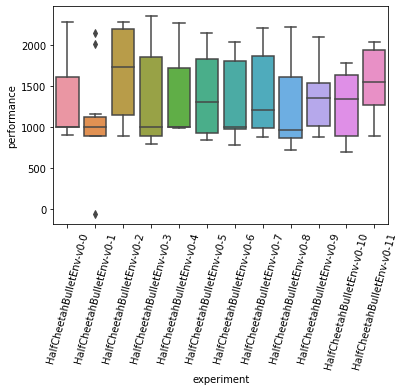

In [21]:
#init and automatically filled variables
vStat = []
iev = {}
cv = {}
experiments = [expName+"-"+str(x) for x in range(0,numExp)]

for experiment in experiments:
    expDir = f"./{rootDir}/{experiment}"
    for i in range(initSeed,numSeed+1):
        try:
            f = open(f"{expDir}/S{i}.fit", "r")            
        except:
            print(f"{expDir}/S{i}.fit didn't exist")            
            
        line = f.read()            
        m = re.search("bestgfit ([0-9]*.[0-9]{2})", line)
        if m:
            best_g_fit = float(m.group(1))
        else:
            print(f"Couldn't extract the best_g_fit from {expDir}/S{i}.fit")

        vStat.append((experiment, i, best_g_fit))
            
        try:
            if experiment not in iev.keys():
                iev[experiment] = []
                cv[experiment] = []                
            iev[experiment].append(np.load(f"{experiment}/S{i}.iev.npy", "r"))
            cv[experiment].append(np.load(f"{experiment}/S{i}.cv.npy", "r"))
        except:
            pass
            
#print(f"Average performance on {numSeed} seeds: {np.mean(vStat)} - Std deviation: {np.std(vStat)}")
df = pd.DataFrame(vStat,columns=['experiment','seed','performance'])
ax = sns.boxplot(x=df.experiment,y=df.performance)
aux = plt.xticks(rotation=75)

In [29]:
import re

t = "Seed 10 (100.2%) gen 285 msteps 50 bestfit 1327.36 bestgfit 1270.97 bestsam 1311.90 avgfit 922.21 paramsize 0.09"
m = re.search("bestgfit ([0-9]*.[0-9]{2})", t)
print(m)
if m:
   print(m.group(1))

<re.Match object; span=(51, 67), match='bestgfit 1270.97'>
1270.97


In [12]:
ver = 9
df[df['experiment']==expName+f"-{ver}"]

,experiment,seed,performance
90,HopperBulletEnv-v0-9,1,1265.84
91,HopperBulletEnv-v0-9,2,552.41
92,HopperBulletEnv-v0-9,3,552.01
93,HopperBulletEnv-v0-9,4,1233.41
94,HopperBulletEnv-v0-9,5,546.85
95,HopperBulletEnv-v0-9,6,546.41
96,HopperBulletEnv-v0-9,7,536.42
97,HopperBulletEnv-v0-9,8,532.70
98,HopperBulletEnv-v0-9,9,1082.46
99,HopperBulletEnv-v0-9,10,542.71
